# Data Wrangling II
### Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

Reason and document your approach properly.

## Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Name,Class,Div,Marks,Age
0,Alice,8.0,B,93.0,14.0
1,Bob,9.0,C,87.0,15.0
2,Charlie,7.0,A,78.0,13.0
3,David,6.0,D,82.0,12.0
4,Elizabeth,NaN,a,90.0,16.0


adding outliers since we didnt have it

In [ ]:
new_rows = pd.DataFrame([
    {'Name': 'Jeff', 'Class': 12, 'Age': 25, 'Marks': 100, 'Div': 'A'},
    {'Name': 'LO', 'Class': 11, 'Age': 24, 'Marks': 12, 'Div': 'B'},
    {'Name': 'Olier', 'Class': 10, 'Age': 23, 'Marks': 4, 'Div': 'C'},
])

df = pd.concat([df, new_rows], ignore_index=True)

## Missing values

In [ ]:
df.isna().sum()

Name     1
Class    2
Div      1
Marks    1
Age      1
dtype: int64

In [ ]:
df[['Class', 'Marks', 'Age']] = df[['Class', 'Marks', 'Age']].ffill()

In [ ]:
df.isna().sum()

Name     1
Class    0
Div      1
Marks    0
Age      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Name     0
Class    0
Div      0
Marks    0
Age      0
dtype: int64

## Removing inconsistencies

In [ ]:
df['Div'] = df['Div'].str.upper()

In [ ]:
df['Name'] = df['Name'].str.title()

In [ ]:
df

,Name,Class,Div,Marks,Age
0,Alice,8.0,B,93.0,14.0
1,Bob,9.0,C,87.0,15.0
2,Charlie,7.0,A,78.0,13.0
3,David,6.0,D,82.0,12.0
4,Elizabeth,6.0,A,90.0,16.0
5,Frank,8.0,C,79.0,14.0
6,Grace,9.0,B,85.0,15.0
7,Harry,7.0,D,88.0,13.0
8,Ingrid,6.0,A,88.0,12.0
9,Jack,5.0,B,84.0,11.0


In [ ]:
df[['Class', 'Age']] = df[['Class', 'Age']].astype(int)

## Outlier detection

#### 1. Box plot

<Axes: >

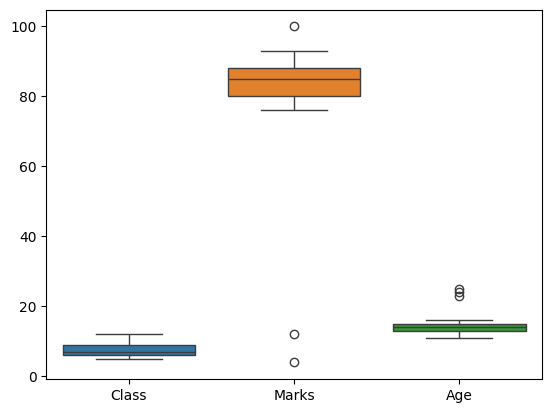

In [ ]:
sns.boxplot(df)

#### 2. IQR

In [ ]:
numeric_df = df[['Class', 'Age', 'Marks']]

q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)

iqr = q3 - q1

ub = q3 + 1.5 * iqr
lb = q1 - 1.5 * iqr

In [ ]:
filtered_data = numeric_df[~((numeric_df > ub) | (numeric_df < lb))]

In [ ]:
filtered_data.dropna(inplace=True)
filtered_data.shape

(27, 3)

#### 3. z-score

In [ ]:
z_scores = (numeric_df - numeric_df.mean()) / numeric_df.std()
filtered_data = numeric_df[(z_scores < 3) & (z_scores > -3)]
filtered_data.shape

(30, 3)

In [ ]:
filtered_data.dropna(inplace=True)
filtered_data.shape

(28, 3)

### Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
minmax = MinMaxScaler()
_std = StandardScaler()

In [ ]:
minmax_scaled = minmax.fit_transform(filtered_data)

In [ ]:
std_scaled = _std.fit_transform(filtered_data)

In [ ]:
log_scaled = np.log(filtered_data)

In [ ]:
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=['c1', 'c2', 'c3'])

In [ ]:
minmax_scaled_df.head()

,c1,c2,c3
0,0.428571,0.214286,0.708333
1,0.571429,0.285714,0.458333
2,0.285714,0.142857,0.083333
3,0.142857,0.071429,0.250000
4,0.142857,0.357143,0.583333
